# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Obtain the data file

In [43]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

File already exists
File is readable


In [44]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [45]:
labels

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [46]:
df.shape

(50, 5)

In [47]:
df.replace(to_replace = 0.00, value = df.mean(axis=0, numeric_only=True), inplace=True)  # inject the mean of the column when value is 0
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [48]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [49]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [50]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [51]:
df_one = pd.get_dummies(df_sel["State"], dtype=int)

In [52]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [53]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


In [54]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [55]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [56]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [57]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [58]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


In [59]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [60]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [61]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Train the Logistic Regression Model

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)


***Plot results***

Correlation Matrix

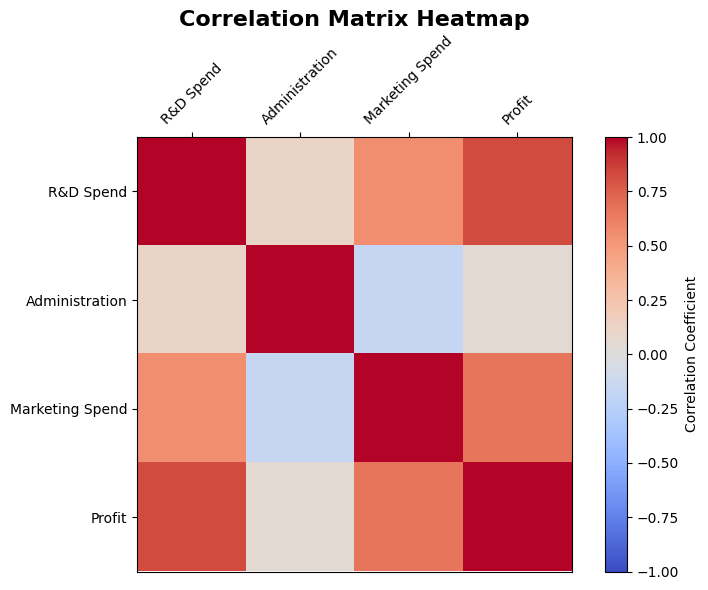

In [64]:
correlation_matrix = np.corrcoef(X_train, rowvar=False)
feature_names = df_fin.columns[1:5]

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='equal', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')

plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='center')  # allineare
plt.yticks(range(len(feature_names)), feature_names)
ax = plt.gca()
ax.xaxis.set_label_position('top')  # labels to the top
ax.xaxis.tick_top()  # ticks at the top

plt.title("Correlation Matrix Heatmap",fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Confusion Matrix

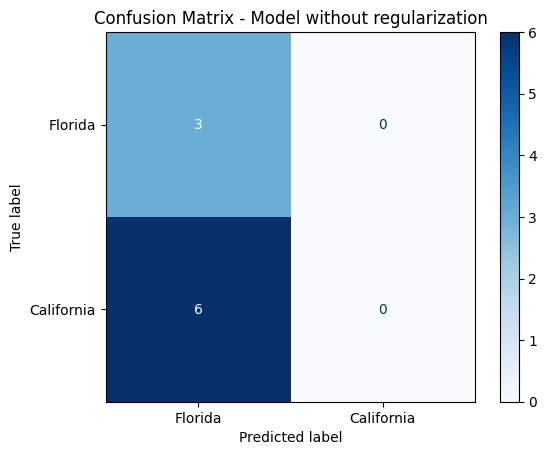

<Figure size 100x100 with 0 Axes>

In [65]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Florida", "California"])

disp.plot(cmap='Blues')

plt.title('Confusion Matrix - Model without regularization')
plt.figure(figsize=(1, 1))
plt.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

Loss functions:

In [66]:
import numpy.linalg as LA

def sigmoid(X, w, bias):
    y = 1 / (1 + np.exp(-(np.dot(X, w) + bias)))
    return y

def logisticRidgeLoss(X, labels, w, bias, lam):
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(labels*np.log(sigmoid(X,w,bias)) + (1-labels)*np.log(1-sigmoid(X,w,bias))) + lam * LA.norm(w, 2)**2
    return cost

def logisticLassoLoss(X, labels, w, bias, lam):
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(labels*np.log(sigmoid(X,w,bias)) + (1-labels)*np.log(1-sigmoid(X,w,bias))) + (lam * LA.norm(w, 1))
    return cost

def logisticElasticNetLoss(X, labels, w, bias, lam, alpha):
    n = np.shape(X)[0]
    cost = -(1/n)*np.sum(labels*np.log(sigmoid(X,w,bias)) + (1-labels)*np.log(1-sigmoid(X,w, bias))) + (lam * ( alpha * LA.norm(w, 2)**2 + (1-alpha) * LA.norm(w, 1)))
    return cost

Gradient Descent Logistic regression with regularization

In [67]:
def penalty(w, p_type):
    # evaluate penalty
    if p_type == "l2": return w
    elif p_type == "l1": return np.sign(w)
    elif p_type[0] == "ElNet": return (p_type[1] * w) + ((1 - p_type[1]) * np.sign(w))
    else: return 0


def GD_fit(X, y, iter, lr, p_type, lam):
    # given X_train and labels y_train, returns the weights W
    
    # gradient descent parameters: 
    # iter: number of iterations
    # lr: learning rate
    # lam: regularization parameter
    
    n_points, n_features = np.shape(X) # dimensions
    w = np.zeros(n_features)
    bias = 0
    loss = []
    
    for i in range(iter):
        # update w and b at each iteration
        w -= (lr/n_points) * (np.dot(X.T, (sigmoid(X, w, bias) - y)) + lam * penalty(w, p_type))
        bias -= (lr/n_points) * np.sum(sigmoid(X, w, bias) - y)
        
        if p_type == "l2": loss.append(logisticRidgeLoss(X, y, w, bias, lam))
        elif p_type == "l1": loss.append(logisticLassoLoss(X, y, w, bias, lam))
        elif p_type[0] == "ElNet": loss.append(logisticElasticNetLoss(X, y, w, bias, lam, p_type[1]))
        
    
    return w, bias, loss
        
        
def model_predict(X_test, w, bias, tr=0.5):
    # given test points predict features at a certain trashold tr
    
    predict_proba = sigmoid(X_test, w, bias)
    n_points = np.shape(predict_proba)[0]
    predictions = np.zeros(n_points)
    
    for i in range(n_points): 
        if predict_proba[i] <= tr:
            predictions[i] = 0
        else:
            predictions[i] = 1
     
    return predictions, predict_proba

Ridge Regularization L2

In [68]:
iter = 1000
lr = 0.001 # learning rate
lam = 0.01

w_ridge, b_ridge, loss_ridge = GD_fit(X_train, y_train, iter, lr, "l2", lam)
ridge_pred, ridge_proba = model_predict(X_test, w_ridge, b_ridge)

Lasso Regularization L1

In [69]:
w_lasso, b_lasso, loss_lasso = GD_fit(X_train, y_train, iter, lr, "l1", lam)
lasso_pred, lasso_proba = model_predict(X_test, w_ridge, b_ridge)

Elastic Net Regularization

In [ ]:
ratio = 0.5 # mixing factor of L2 and L1

w_ElNet, b_ElNet, loss_ElNet = GD_fit(X_train, y_train, iter, lr, ("ElNet", ratio), lam)
ElNet_pred, ElNet_proba = model_predict(X_test, w_ridge, b_ridge)

Plot Loss over GD iterations

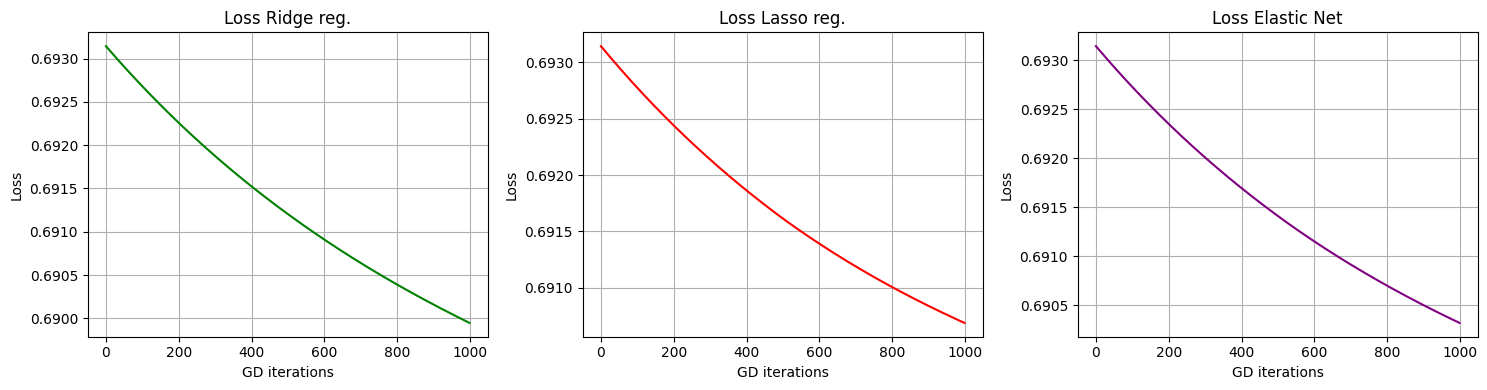

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

ax1.plot(loss_ridge, color='green')
ax1.set_xlabel("GD iterations")
ax1.set_ylabel("Loss")
ax1.set_title("Loss Ridge reg.")
ax1.grid()

ax2.plot(loss_lasso, color='red')
ax2.set_xlabel("GD iterations")
ax2.set_ylabel("Loss")
ax2.set_title("Loss Lasso reg.")
ax2.grid()

ax3.plot(loss_ElNet, color='purple')
ax3.set_xlabel("GD iterations")
ax3.set_ylabel("Loss")
ax3.set_title("Loss Elastic Net")
ax3.grid()

plt.tight_layout()
plt.show()

***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [72]:
def eval_fpr_tpr(X_test, y_test, weights, bias, reg):
    
    # Create TruePositiveRate, FalsePositiveRate, and tresholds between 0 and 1
    fpr = []
    tpr = []
    thresholds = np.linspace(0, 1, 7200)
    
    for tr in thresholds:
        # test model whit tr as trashold
        if reg:
            model_pred = model_predict(X_test, weights, bias, tr)[0] 
        else:
            probs = LR.predict_proba(X_test)[:, 1]
            model_pred = (probs >= tr).astype(int)
        
        tp = np.sum((model_pred == 1) & (y_test == 1))  # true positives
        fp = np.sum((model_pred == 1) & (y_test == 0))  # false positives
        tn = np.sum((model_pred == 0) & (y_test == 0))  # true negatives
        fn = np.sum((model_pred == 0) & (y_test == 1))  # false negatives
        
        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
        
    return fpr, tpr

plot ROC:

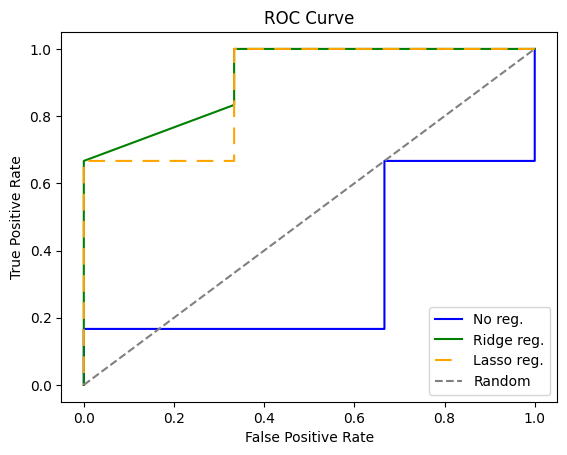

In [73]:
fpr_noReg,  tpr_noReg = eval_fpr_tpr(X_test, y_test, weights=0, bias=0, reg=False)
fpr_ridge,  tpr_ridge = eval_fpr_tpr(X_test, y_test, w_ridge, bias=b_ridge, reg=True)
fpr_lasso,  tpr_lasso = eval_fpr_tpr(X_test, y_test, w_lasso, bias=b_lasso, reg=True)
fpr_ElNet,  tpr_ElNet = eval_fpr_tpr(X_test, y_test, w_ElNet, bias=b_ElNet, reg=True)

plt.plot(fpr_noReg, tpr_noReg, color='blue')
plt.plot(fpr_ridge, tpr_ridge, color='green')
plt.plot(fpr_lasso, tpr_lasso, linestyle=(0, (8, 5)), color='orange')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(["No reg.", "Ridge reg.", "Lasso reg.", "Random"], loc='lower right')
plt.show()

plot confusion matrix

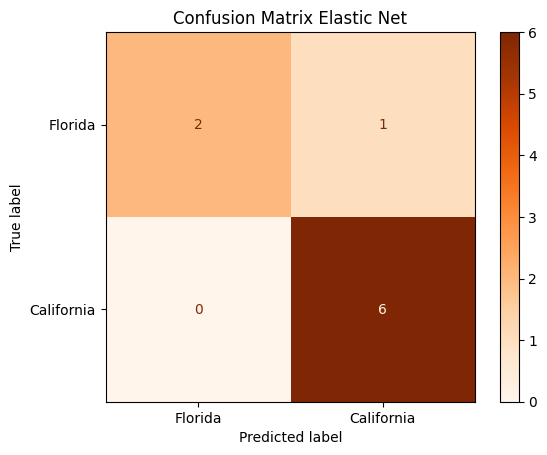

<Figure size 100x100 with 0 Axes>

In [74]:
cm = metrics.confusion_matrix(y_test, ElNet_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Florida", "California"])

disp.plot(cmap='Oranges')
plt.title("Confusion Matrix Elastic Net")
plt.figure(figsize=(1, 1))

plt.show()

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [75]:
def eval_accuracy(y_true, y_pred):
    n_points = len(y_true)
    
    tp = np.sum((y_pred == 1) & (y_true == 1))  # true positives
    fp = np.sum((y_pred == 1) & (y_true == 0))  # false positives
    tn = np.sum((y_pred == 0) & (y_true == 0))  # true negatives
    fn = np.sum((y_pred == 0) & (y_true == 1))  # false negatives
    
    accuracy = (tp+tn)/n_points
    return round(accuracy, 3)

evaluate the best threshold

In [76]:
thresholds = np.linspace(0, 1, 900)

best_acc_ridge = 0
best_tr_ridge = 0
for tr in thresholds:
    i = eval_accuracy(y_test, model_predict(X_test, w_ridge, b_ridge, tr)[0] )
    if i >= best_acc_ridge:
        best_acc_ridge = i
        best_tr_ridge = tr

best_acc_lasso = 0
best_tr_lasso = 0
for tr in thresholds:
    i = eval_accuracy(y_test, model_predict(X_test, w_lasso, b_lasso, tr)[0] )
    if i >= best_acc_lasso:
        best_acc_lasso = i
        best_tr_lasso = tr
        
best_acc_ElNet = 0
best_tr_ElNet = 0
for tr in thresholds:
    i = eval_accuracy(y_test, model_predict(X_test, w_ElNet, b_ElNet, tr)[0] )
    if i >= best_acc_ElNet:
        best_acc_ElNet = i
        best_tr_ElNet = tr

print(f"Best threshold for Ridge: {round(best_tr_ridge, 4)}, Accuracy:  {best_acc_ridge}")
print(f"Best threshold for Lasso: {round(best_tr_lasso, 4)}, Accuracy:  {best_acc_lasso}")
print(f"Best threshold for ElNet: {round(best_tr_ElNet, 4)}, Accuracy:  {best_acc_ElNet}")

Best threshold for Ridge: 0.4805, Accuracy:  0.889
Best threshold for Lasso: 0.4805, Accuracy:  0.889
Best threshold for ElNet: 0.4805, Accuracy:  0.889


re-calculate prediction with best threshold

In [77]:
ridge_pred, ridge_proba = model_predict(X_test, w_ridge, b_ridge, tr=0.4805)
lasso_pred, lasso_proba = model_predict(X_test, w_ridge, b_ridge, tr=0.4805)
ElNet_pred, ElNet_proba = model_predict(X_test, w_ridge, b_ridge, tr=0.4805)

In [78]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

print(eval_accuracy(y_true, y_pred))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9

0.333


/Users/matteovicenzino/Documents/UNI/3_anno_24_25/ML/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matteovicenzino/Documents/UNI/3_anno_24_25/ML/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matteovicenzino/Documents/UNI/3_anno_24_25/ML/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Repeat the previous task for regularized logistic regression and compare the results.

In [79]:
print(classification_report(y_true, ridge_pred, target_names=target_names))
print(eval_accuracy(y_true, ridge_pred))

              precision    recall  f1-score   support

  California       1.00      0.67      0.80         3
     Florida       0.86      1.00      0.92         6

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9

0.889


In [80]:
print(classification_report(y_true, lasso_pred, target_names=target_names))
print(eval_accuracy(y_true, lasso_pred))

              precision    recall  f1-score   support

  California       1.00      0.67      0.80         3
     Florida       0.86      1.00      0.92         6

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9

0.889


In [81]:
print(classification_report(y_true, ElNet_pred, target_names=target_names))
print(eval_accuracy(y_true, ElNet_pred))

              precision    recall  f1-score   support

  California       1.00      0.67      0.80         3
     Florida       0.86      1.00      0.92         6

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9

0.889


Confusion Matrix of regularized models

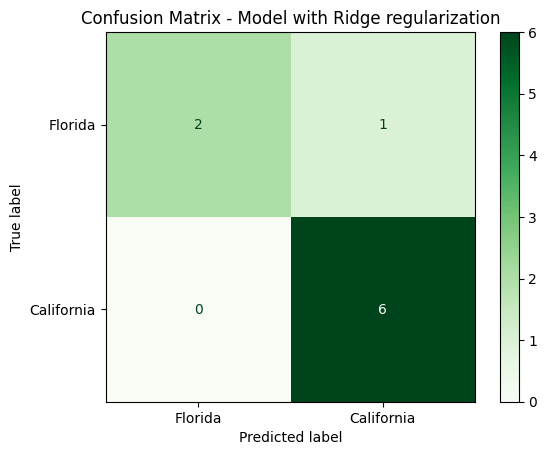

<Figure size 100x100 with 0 Axes>

In [82]:
cm = metrics.confusion_matrix(y_test, ridge_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Florida", "California"])

disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Model with Ridge regularization")
plt.figure(figsize=(1, 1))

plt.show()